## Author : Rutuja Fursule

## Task 2 : Prediction using Unsupervised Machine Learning

## GRIP @ The Sparks Foundation


### In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

## Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
import warnings
warnings.filterwarnings('ignore')

## reading the data

In [2]:
data= pd.read_csv(r"E:\DS\Spark Internship\Dataset\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Removing 'Id' and 'Species' columns

In [5]:
data.drop(['Id','Species'], axis = 1, inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Pre-processing

In [7]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

#### There is no null value in the datasets.

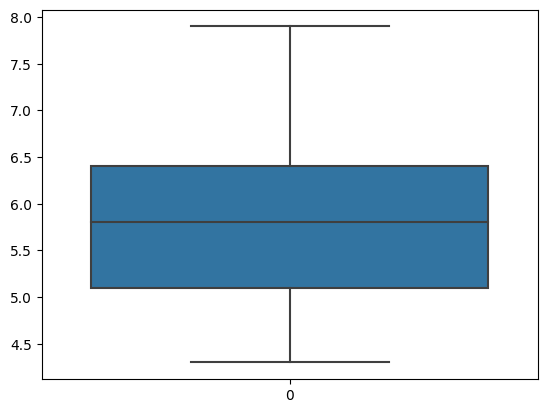

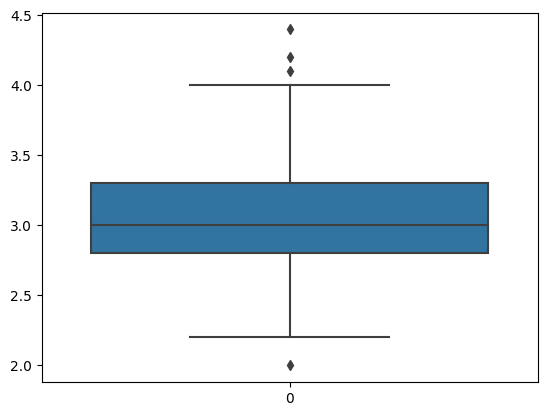

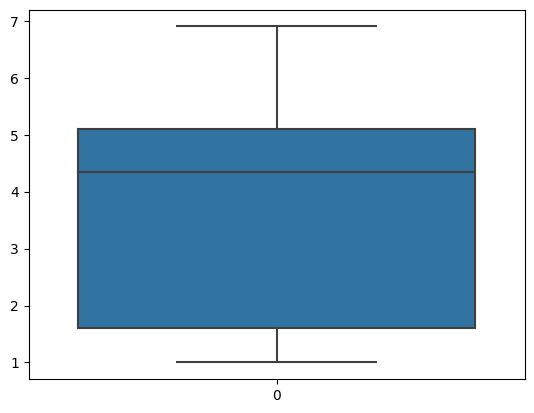

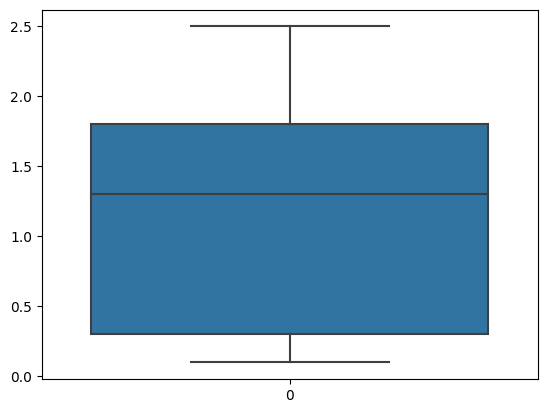

In [8]:
for i in data:
    #print(i)
    if data[i].dtypes==np.int64 or data[i].dtypes==np.float64:
        plt.figure()
        sns.boxplot(data[i])

#### Outliers are present in sepalwidth column

In [9]:
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

In [10]:
print(data. columns)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [11]:
data = winsor.fit_transform(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

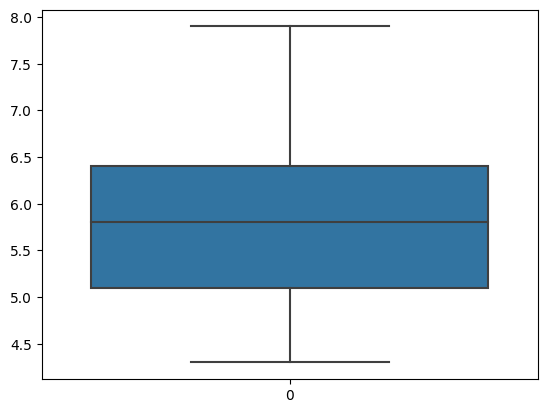

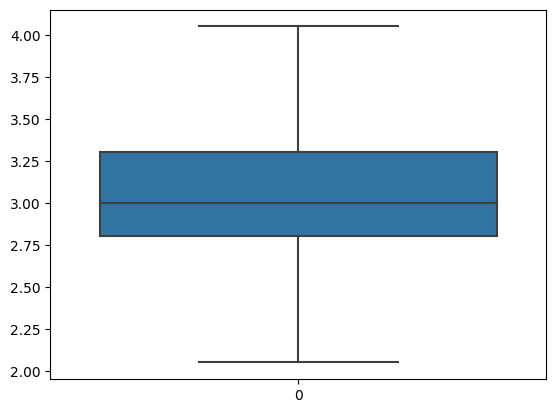

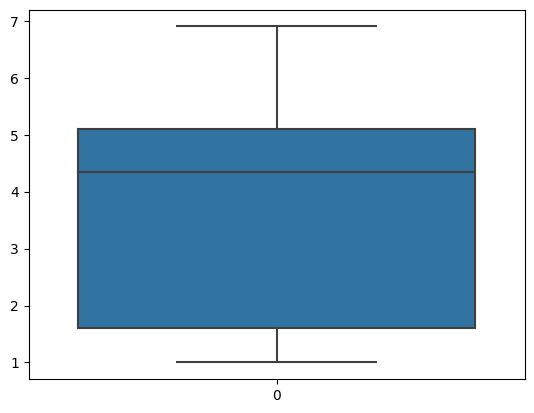

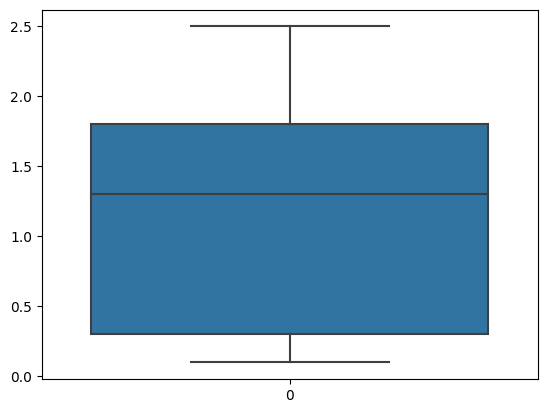

In [12]:
for i in data:
    #print(i)
    if data[i].dtypes==np.int64 or data[i].dtypes==np.float64:
        plt.figure()
        sns.boxplot(data[i])

#### Outliers are removed successfully

## Normalizing the data

In [13]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

In [14]:
df_norm = norm_func(data)

In [15]:
df_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.500333,0.467571,0.457778
std,0.230018,0.211518,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.375000,0.101695,0.083333
50%,0.416667,0.475000,0.567797,0.500000
75%,0.583333,0.625000,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


## scree plot or elbow curve

In [16]:
TWSS = []
k = list(range(2, 9))

In [17]:
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[13.291079253801946,
 7.923648131936301,
 6.322081261332967,
 5.13067073234233,
 4.471078693892314,
 3.9019976520873163,
 3.541506113401023]

Text(0, 0.5, 'total_within_SS')

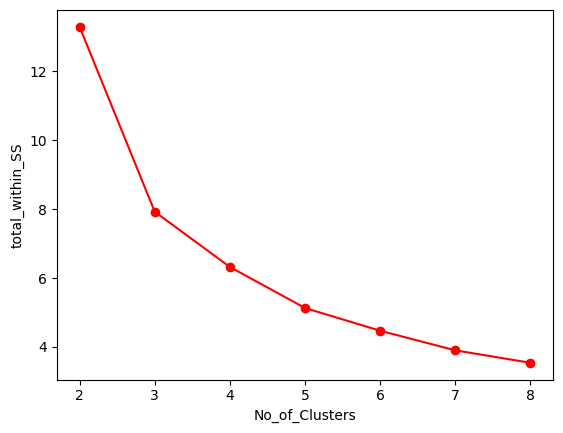

In [18]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

#### The optimum number of cluster is 3

In [19]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(df_norm)

KMeans(n_clusters=3)

In [20]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
data['clust'] = mb # creating a  new column and assigning it to new column 


In [21]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clust
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
data.clust.unique()

array([0, 2, 1])

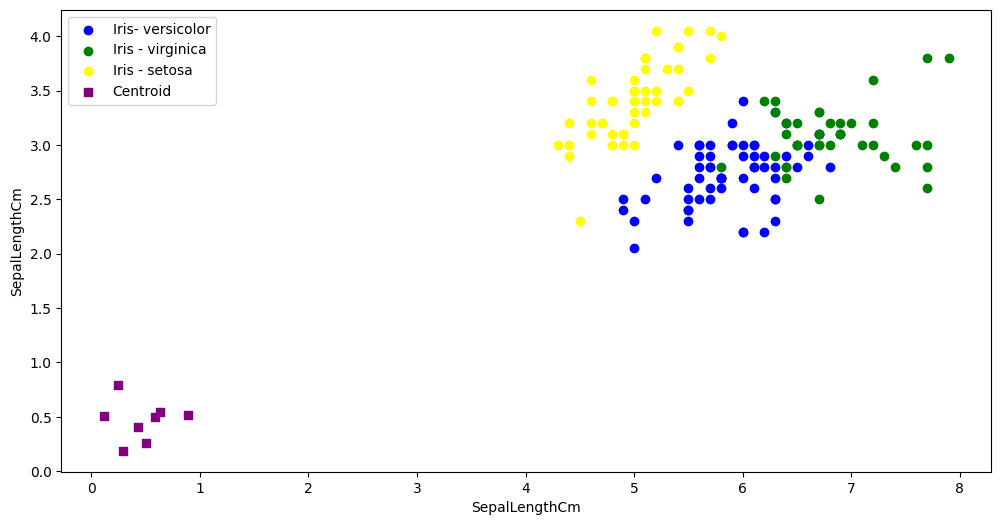

In [23]:
plt.figure(figsize = (12,6))

data1 = data[data.clust==1]
data2 = data[data.clust==2]
data3 = data[data.clust==0]

plt.scatter(data1['SepalLengthCm'], data1['SepalWidthCm'], color = 'blue', label = 'Iris- versicolor' )
plt.scatter(data2['SepalLengthCm'], data2['SepalWidthCm'], color = 'green', label = 'Iris - virginica')
plt.scatter(data3['SepalLengthCm'], data3['SepalWidthCm'], color = 'yellow',label = 'Iris - setosa')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'purple', marker = 's', label = 'Centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalLengthCm')
plt.legend()